In [50]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import csv
%matplotlib inline
import math
import random
from sklearn import metrics


file_path = "/path_to_file/file_name.csv"
df = pd.read_csv(file_path)

#print(df.head())


#variabili per il confronto finale
mse_list_final=[0.0,0.0,0.0]
mse_imp_final=["","",""]
acc_list_final=[0.0,0.0,0.0]
acc_imp_final=["","",""]

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

# About The Dataset
The data consist of the estimation of obesity levels in people from the countries of Mexico, Peru and Colombia, with ages between 14 and 61 and diverse eating habits and physical condition , data was collected using a web platform with a survey where anonymous users answered each question, then the information was processed obtaining 17 attributes and 2111 records.
The attributes related with eating habits are: Frequent consumption of high caloric food (**FAVC**), Frequency of consumption of vegetables (**FCVC**), Number of main meals (**NCP**), Consumption of food between meals (**CAEC**), Consumption of water daily (**CH20**), and Consumption of alcohol (**CALC**). The attributes related with the physical condition are: Calories consumption monitoring (**SCC**), Physical activity frequency (**FAF**), Time using technology devices (**TUE**), Transportation used (**MTRANS**)
variables obtained :
**Gender**, **Age**, **Height** and **Weight**.

**NObesity** values are:

* Underweight
* Normal
* Overweight
* Obesity I
* Obesity II
* Obesity III

In [10]:
dataset

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


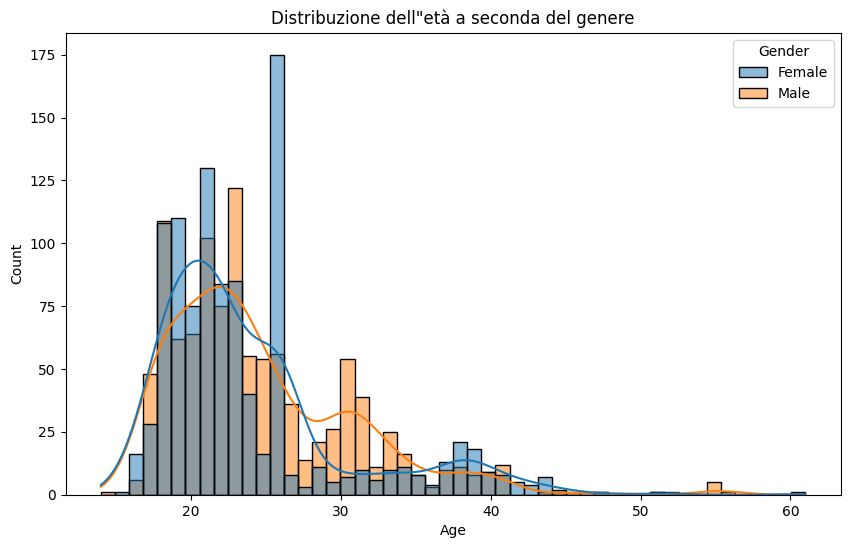

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x="Age", kde=True, hue="Gender")
plt.title("Distribuzione dell\"età a seconda del genere")
plt.show()

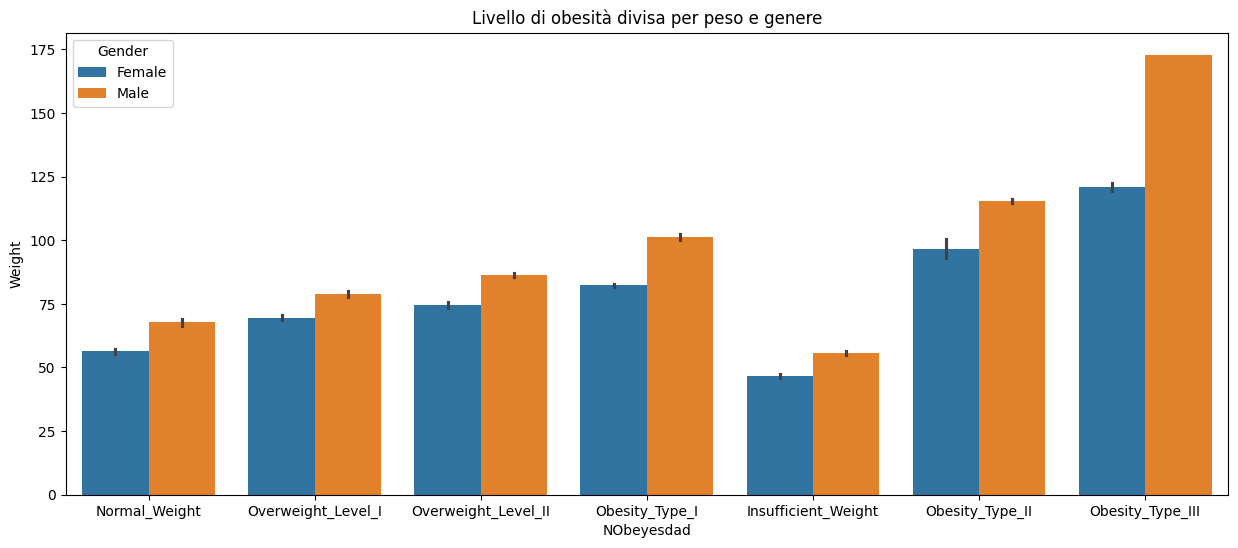

In [12]:
plt.figure(figsize=(15, 6))
sns.barplot(data=dataset, x="NObeyesdad", y="Weight", hue="Gender")
plt.title("Livello di obesità divisa per peso e genere")
plt.show()

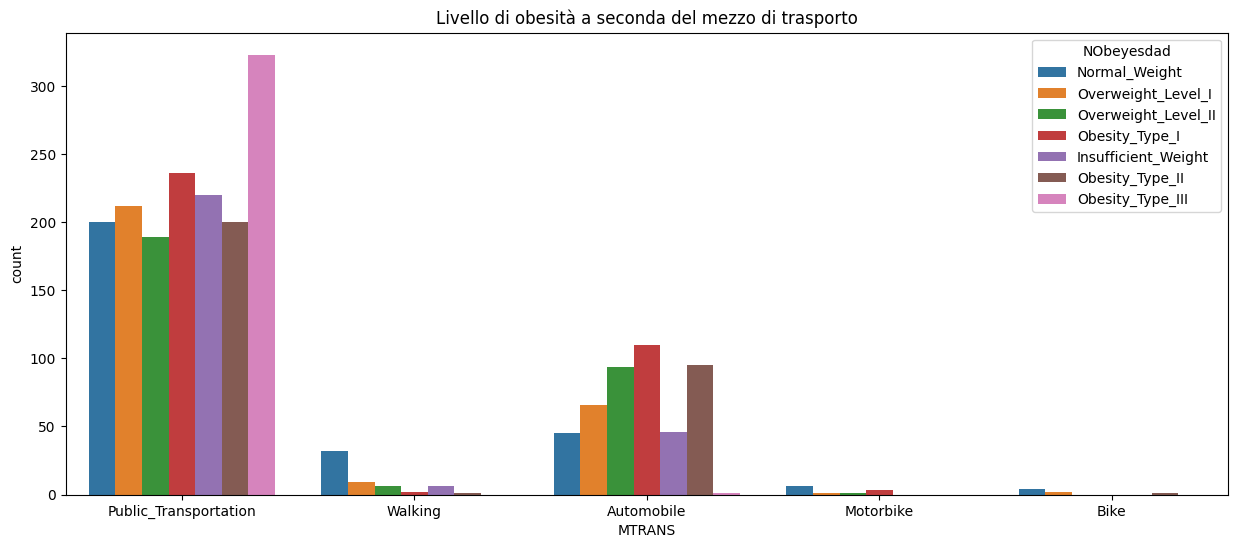

In [13]:
plt.figure(figsize=(15, 6))
sns.countplot(data=dataset, x="MTRANS", hue="NObeyesdad")
plt.title("Livello di obesità a seconda del mezzo di trasporto")
plt.show()

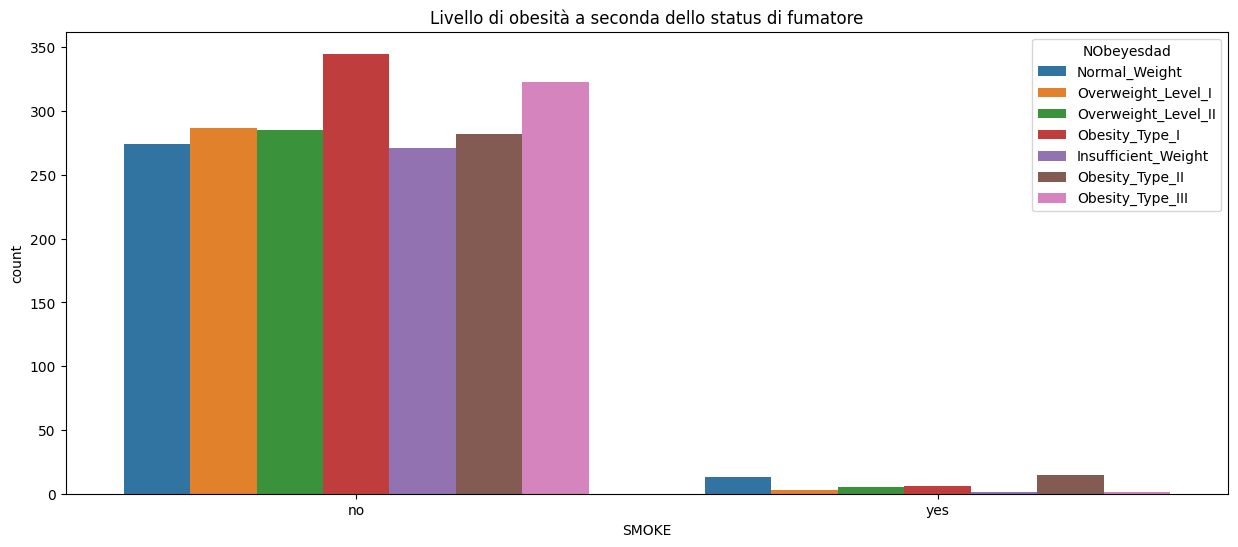

In [14]:
plt.figure(figsize=(15, 6))
sns.countplot(data=dataset, x="SMOKE", hue="NObeyesdad")
plt.title("Livello di obesità a seconda dello status di fumatore")
plt.show()

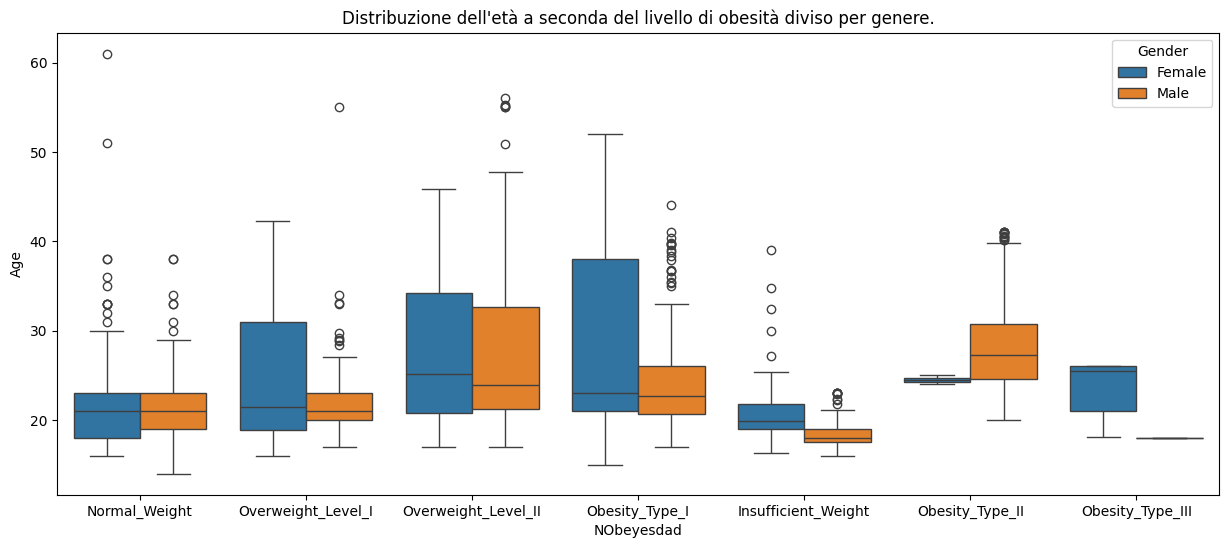

In [15]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=dataset, x="NObeyesdad", y="Age", hue="Gender")
plt.title("Distribuzione dell'età a seconda del livello di obesità diviso per genere.")
plt.show()

# Homework specifications


Building upon the previous tasks of data preparation, cleaning, and exploratory analysis, you are now required to further your analysis by developing and testing different machine learning algorithms. These algorithms are aimed at predicting specific outcomes based on the dataset. You must implement these algorithms from scratch and may use machine learning frameworks only for verifying the quality of your results.

**Algorithms to Implement:**

1. **Linear Regression:** To predict the `Weight` of individuals based on the available attributes.
2. **Decision Trees for Binary Classification:** To classify individuals into two categories of obesity levels (`NObesity` attribute) based on the available attributes.
3. **Logistic Regression:** To classify individuals into two categories of obesity levels (`NObesity` attribute).
4. **K-Nearest Neighbors (KNN):** To classify individuals into two categories of obesity levels (`NObesity` attribute).
5. **Neural Network:** To perform regression in order to predict the `Weight` of individuals based on available attributes. The model should be flexible and allow for a variable number of layers and a variable number of neurons for each layer. These two are hyperparameters of the NN as well as the other "more traditional" hyperparameters.

**Data Preparation:**
- Categorical attributes defined as strings must be encoded before being used as input to the algorithms. You may choose an appropriate encoding method.
- For regression problems, predict the attribute `Weight`.
- For classification, predict the attribute `NObesity`. *Binarize the `NObesity` attribute such that categories below and including "Overweight" are encoded as `0`, and the rest are encoded as `1`*.

**Implementation Guidelines:**
- Your implementations must not use any external machine learning frameworks except for verifying the results. For example, you can use scikit-learn to double check your results but not to fit thye model.
- External frameworks can be used to do everything except build the model. For instance, you can use Pandas to manage dataframes, or you can use scikit-learn to evaluate the performance of your algorithms.
- For each algorithm, you must tune the hyperparameters. Demonstrate where and how you've performed hyperparameter tuning. While exhaustive search is not required, you should clearly indicate the process of hyperparameter tuning and how it can be extended to explore more options.
- Ensure that your notebook runs from beginning to end without errors.

**Critical Analysis:**
- Conclude your notebook with a critical analysis section. This should include observations drawn from your experiments with the implemented algorithms. Discuss the performance, strengths, and weaknesses of each algorithm based on your results.

**Hyperparameter Tuning:**
- Clearly document the process of tuning hyperparameters for each algorithm. Discuss the impact of different hyperparameters on the algorithm's performance and how further tuning could potentially improve the results.

**Submission Requirements:**
- Your submission should include the Jupyter Notebook containing all codes for the algorithms, data preparation and cleaning, exploratory data analysis, hyperparameter tuning, and critical analysis.
- The notebook must be well-organized, properly commented, and should run from start to finish without any errors.

This assignment will challenge your understanding of machine learning concepts, your ability to implement algorithms from scratch, and your analytical skills in interpreting the results. It is an opportunity to demonstrate your proficiency in machine learning and your critical thinking abilities in analyzing and solving problems.

**Deadline for Submission:** Before the end of the semester, which is May 31st 2024.

This is the form to submit your homework: https://forms.gle/RF22sJF3PvLskHLk9

*Note that after you have submitted it you will not allowed to submit another one. Be careful, then!!!*

Please ensure that your submission is complete and adheres to all the specified requirements. Good luck!

# Imposto i valori del dataset e funzioni Utili

Il dataset viene mescolato poichè quando veiva diviso in train e test in qullo di test erano presenti solo tutte persone con sesso femminili

i valori vengono impostati in modo da rimuovere tutte le stinge

Nel caso di regressione tutti le stinghe vengono sostituite con un valore

Nel caso della calssificazione binaria uguale ma la collonna NObeyesdad viene convertita in zero ed uni poiche facciamo la classificazione binaria:
* zero per tutti i valori fino a Overweight level II

* uno per tutti i tipi di obbesita da I a III


invece per gli alberi di decisione si usa una funzine che approssima i valori per evitare di crearare un albero troppo grande

Infine la funzione get_x_y usata nella regeressione per ottenere le matrici con o senza bias e il vettore dei valori da predirre



In [16]:


#dizionari per convertire da stringhe ad interio i valori nel dataset
gender_map={"Male":0,"Female":1};
yesORno_map={"no":0,"yes":1}
frequenza_map={"Sometimes":1,"Frequently":2,"Always":3,"no":0}
mtrans_map={"Public_Transportation":1,"Walking":4,"Automobile":0,"Motorbike":2,"Bike":3}
obesity_map={"Insufficient_Weight":0,"Normal_Weight":1,"Overweight_Level_I":2,"Overweight_Level_II":3,"Obesity_Type_I":4,"Obesity_Type_II":5,"Obesity_Type_III":6}
oberity_class={"Insufficient_Weight":0,"Normal_Weight":0,"Overweight_Level_I":0,"Overweight_Level_II":0,"Obesity_Type_I":1,"Obesity_Type_II":1,"Obesity_Type_III":1}

#mescolo le righe del dataset che sono ordinatre che vedendo il dataset_test risulatvano tutti indivinue femmine
dataset=dataset.sample(frac=1).reset_index(drop=True)

#creazione del dataset di trenig e di test
TRAIN_TEST_SPLIT_PERCENTAGE=0.9
dataset_training = dataset[:int(len(dataset) * TRAIN_TEST_SPLIT_PERCENTAGE)]
dataset_test = dataset[int(len(dataset) * TRAIN_TEST_SPLIT_PERCENTAGE):]



#usata per regressione lineare e reti neurali
def set_dataset(dataset):
  ds=dataset.copy()
  ds.Gender.replace(to_replace=gender_map , inplace=True)
  ds.family_history_with_overweight.replace(to_replace=yesORno_map , inplace=True)
  ds.FAVC.replace(to_replace=yesORno_map , inplace=True)
  ds.SMOKE.replace(to_replace=yesORno_map , inplace=True)
  ds.SCC.replace(to_replace=yesORno_map , inplace=True)
  ds.MTRANS.replace(to_replace=mtrans_map , inplace=True)
  ds.CAEC.replace(to_replace=frequenza_map , inplace=True)
  ds.CALC.replace(to_replace=frequenza_map , inplace=True)
  ds.NObeyesdad.replace(to_replace=obesity_map , inplace=True)
  return ds

#usato per la regressione loggistica
def clas_dataset(dataset):
  ds=dataset.copy()
  ds.Gender.replace(to_replace=gender_map , inplace=True)
  ds.family_history_with_overweight.replace(to_replace=yesORno_map , inplace=True)
  ds.FAVC.replace(to_replace=yesORno_map , inplace=True)
  ds.SMOKE.replace(to_replace=yesORno_map , inplace=True)
  ds.SCC.replace(to_replace=yesORno_map , inplace=True)
  ds.MTRANS.replace(to_replace=mtrans_map , inplace=True)
  ds.CAEC.replace(to_replace=frequenza_map , inplace=True)
  ds.CALC.replace(to_replace=frequenza_map , inplace=True)
  ds.NObeyesdad.replace(to_replace=oberity_class , inplace=True)
  return ds
#usato per gli alberi di classificazione
def tree_dataset(dataset):
  ds=dataset.copy()
  ds.Gender.replace(to_replace=gender_map , inplace=True)
  ds.family_history_with_overweight.replace(to_replace=yesORno_map , inplace=True)
  ds.FAVC.replace(to_replace=yesORno_map , inplace=True)
  ds.SMOKE.replace(to_replace=yesORno_map , inplace=True)
  ds.SCC.replace(to_replace=yesORno_map , inplace=True)
  ds.MTRANS.replace(to_replace=mtrans_map , inplace=True)
  ds.CAEC.replace(to_replace=frequenza_map , inplace=True)
  ds.CALC.replace(to_replace=frequenza_map , inplace=True)
  ds.NObeyesdad.replace(to_replace=oberity_class , inplace=True)
  ds['Height']=ds['Height'].multiply(100)
  return ds.round(0)

#uasta nel KNN
def normalaiz_dataset(dataset,binaria):
  ds=dataset.copy()
  ds.Gender.replace(to_replace=gender_map , inplace=True)
  ds.family_history_with_overweight.replace(to_replace=yesORno_map , inplace=True)
  ds.FAVC.replace(to_replace=yesORno_map , inplace=True)
  ds.SMOKE.replace(to_replace=yesORno_map , inplace=True)
  ds.SCC.replace(to_replace=yesORno_map , inplace=True)
  ds.MTRANS.replace(to_replace=mtrans_map , inplace=True)
  ds.CAEC.replace(to_replace=frequenza_map , inplace=True)
  ds.CALC.replace(to_replace=frequenza_map , inplace=True)
  #classificazione binaria per il KNN
  if binaria:
    ds.NObeyesdad.replace(to_replace=oberity_class , inplace=True)

  col = ds["NObeyesdad"]
  del ds["NObeyesdad"]
  ds=((ds-ds.mean())/ds.std())
  ds=pd.concat([ds,col],axis=1)
  return ds


def get_x_y(setdata,str,bias=False):
  #questa funzione permette di levare la collonna del datadest che vogliamo usare come valore di risultato
  #se bias è True aggiunge una prima collonna di uni alla matrice x come bias
  x = setdata.copy()
  y = setdata[str].reset_index(drop=True).to_numpy()
  del x[str]
  x=x.to_numpy()

  if bias:
    bias_vector=np.ones(shape=(len(x),1))
    x=np.concatenate((bias_vector,x),axis=1)

  return (x,y)

# Ricerca degli Iperparametri

Per individuare i valori ottimali degli iperparametri, la funzione esplora diverse combinazioni di parametri fornite alla funzione stessa.

Era possibile implementare una grid search, che avrebbe testato tutte le combinazioni possibili e non solo quelle passate come parametro. Tuttavia, ho preferito non farlo per evitare tempi di esecuzione eccessivi nel notebook Collab.

La funzione utilizza i seguenti parametri:

* Funzioni di training e predizione
* Un flag booleano per indicare se si tratta di un problema di regressione o classificazione
* Il set di training e il set di test
* Gli iperparametri da ottimizzare
* Una lista contenente nellostesso ordine il nome degli iperparametri

La funzione restituisce la combinazione di iperparametri che ottiene le migliori prestazioni.

In [17]:
def iper_s(fn_train,fn_pred,isReg,x_train,y_train,x_test,y_test,iper_par,iper_name):

  metrica_migliore=None
  scelti=None

  for parmametri in iper_par:
    if fn_train.__name__ ==  'reti_neurali':#le reti neurali funzionano leggermente diversa degli alti e cosi facendo le gestiamo

      layer=[x_train.shape[1]]+parmametri[0]+[1]#il primo è l'imput e l'ultmio e l'output


      weight = setweights(layer)

      weight=fn_train(x_train,y_train,weight,layer,parmametri[1],parmametri[2],False)

      y_pred=fn_pred(x_test,weight,layer)

    elif fn_train.__name__ =='predict_knn':#per la knn vale la stessa cosa delle reti neurali
      y_pred=fn_train(x_train,x_test,y_train,*parmametri)

    else:
      c,_=fn_train(x_train,y_train,*parmametri)
      y_pred=fn_pred(x_test,c)

    if isReg:
      mse=metrics.mean_squared_error(y_test,y_pred)

      if  metrica_migliore is None or mse<metrica_migliore:
        metrica_migliore=mse
        scelti=parmametri


      print("MSE di: "+str(mse)+" per i parametri ", end=' ')
      for i in range(len(parmametri)):
        print(iper_name[i]+" "+str(parmametri[i]),end='; ')
      print()

    else:
      acc=metrics.accuracy_score(y_test,y_pred)

      if  metrica_migliore is None or acc>metrica_migliore:
        metrica_migliore=acc
        scelti=parmametri


      print("accuracy di: {:.2f}%".format(acc * 100)+" per i parametri ", end=' ')
      for i in range(len(parmametri)):
        print(iper_name[i]+" "+str(parmametri[i]),end='; ')
      print()

  return scelti

# Regressione Lineare con equazione normale

Utilizzo la forma chiusa per l'equazione normale:

 $$(X^TX)^{-1}X^TY$$

Le funzione implementate per il modello sono:
* linear_regression
* predict

In quasto primo modello,come in seguito tutt gli altri modelli di rgressione, andremmo a stimare il peso a partire dagli altri valori forniti nel dataset


In [18]:
#implementazione

#creo funzine per calcolareo la regresione lineare
def linear_regression(x,y):

  #c=(X^T*X)^-1*X^T*y
  c=np.linalg.inv(x.T@x)@x.T@y

  return c


#definisco una funzione di pedizione per testare
def predict(test,c):

  y_pred=test@c

  return y_pred

## Test e confornto con sklearn

Confornto le metriche MSE, MAE della mia implementazione con quelle di sklearn.

Come si puo vedere anche dal grafico i risultati sono quasi identici









In [19]:
#test
ds=set_dataset(dataset_training)
ds_test=set_dataset(dataset_test)
x , y=get_x_y(ds,"Weight",True)
x_test ,y_test=get_x_y(ds_test,"Weight",True)
c=linear_regression(x,y)


y_pred = predict(x_test, c)

mae = metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test,y_pred)
print("our MSE = " + str(mse))
print("our MAE = " + str(mae))
mse_list_final[0]=mse
mse_imp_final[0]="regressione lineare con equazione normale"

our MSE = 33.65640192668633
our MAE = 4.430899783261775


C:\Users\user\AppData\Local\Temp\ipykernel_7500\2113211314.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds.Gender.replace(to_replace=gender_map , inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_7500\2113211314.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ds.Gender.replace(to

In [20]:
#risulati di sklearn per il confronto

from sklearn.linear_model import LinearRegression

model_lr=LinearRegression()
model_lr.fit(x,y)
y_pred_sk=model_lr.predict(x_test)
mae_sk = metrics.mean_absolute_error(y_test, y_pred_sk)
mse_sk=metrics.mean_squared_error(y_test,y_pred_sk)
print("our MSE = " + str(mse_sk))
print("our MAE = " + str(mae_sk))


our MSE = 33.65640192668801
our MAE = 4.430899783262208


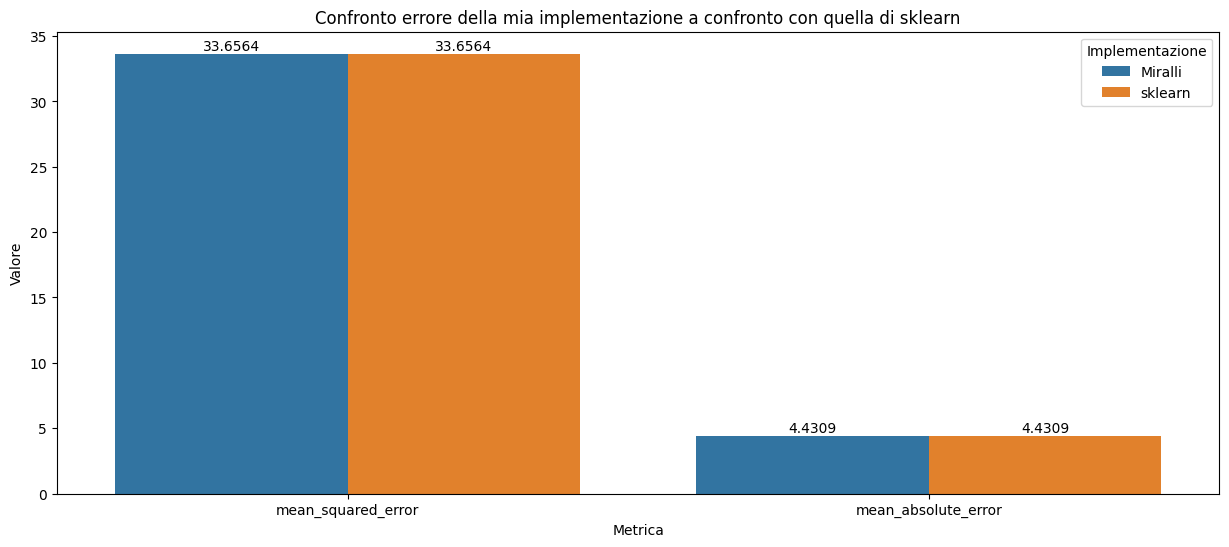

In [21]:
#grafici
err={"Valore":[mse,mae,mse_sk,mae_sk],
     "Metrica":["mean_squared_error","mean_absolute_error","mean_squared_error","mean_absolute_error"],
     "Implementazione":["Miralli","Miralli","sklearn","sklearn"]}
err_df=pd.DataFrame(data=err)


plt.figure(figsize=(15, 6))
x=sns.barplot(data=err_df, x="Metrica", y="Valore", hue="Implementazione")
x.bar_label(x.containers[0])
x.bar_label(x.containers[1])
plt.title("Confronto errore della mia implementazione a confronto con quella di sklearn")
plt.show()

## Conlusioni sul modello

Sebbene la formula chiusa sia rinomata per la sua accuratezza, la sua applicabilità su dataset voluminosi è ostacolata dall'elevato costo computazionale associato al calcolo dell'inversa della matrice.

---



# regressione lineare con discesa del gradiente stocastica

Funzioni implementate per il modello sono:

* **gradiente_discesa_stocastico**
* **predict_SDG**

In questo modello come il precedente andremmo a stimare il peso a partire dagli altri attributi del dataset  

In [22]:
#implementazione
#def gradiente_discesa_stocastico(x, y,alpha=10e-5,num_iterations=400000,mini_batch=8):
def gradiente_discesa_stocastico(x, y,alpha,num_iterations,mini_batch,grafico=False):
  _,n=np.shape(x)
  c=np.random.rand(n,)
  x_div=np.array_split(x,mini_batch)
  y_div=np.array_split(y,mini_batch)
  mse_list=[]

  for i in range(num_iterations):

    grad=2*(x_div[i%mini_batch].T@((x_div[i%mini_batch]@c)-y_div[i%mini_batch]))/n

    c=c-alpha*grad


    if grafico and i%1000==0:
      y_pred=predict_SGD(x_div[i%mini_batch],c)
      mse=metrics.mean_squared_error(y_div[i%mini_batch],y_pred)
      mse_list.append(mse)

  return c,mse_list


#uguale a quella della rigressione lineare, la ripeto per permettere di eseguire le cose in maniera separata
def predict_SGD(test,c):

  y_pred=test@c

  return y_pred

## Ricerca iperparametri

Qui cerco i migliori iperparametri con la funzione da me implementata essenodo un modello di regressione si prenderenno gli iperparametri che minimanizano MSE.

Per il modello di regressione lineare con discesa del gradiente stocastica sono:

* alpha
* numero di iterazioni
* mini batch

In [23]:
ds=set_dataset(dataset_training)
ds_test=set_dataset(dataset_test)

x , y=get_x_y(ds,"Weight",True)
x_test ,y_test=get_x_y(ds_test,"Weight",True)
#fn_train,fn_pred,isReg,x_train,y_train,x_test,y_test,iper_par
iper=[[10e-6,200000,4],[10e-5,100000,15],[10e-5,400000,8]]
name=["alpha","numero di iterazione","mini batch"]
scelti_sgd=iper_s(gradiente_discesa_stocastico,predict_SGD,True,x,y,x_test,y_test,iper,name)
print(f"Parametri scelti {name[0]}: {scelti_sgd[0]}; {name[1]}: {scelti_sgd[1]}; {name[2]}: {scelti_sgd[2]}; ")


C:\Users\user\AppData\Local\Temp\ipykernel_7500\2113211314.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds.Gender.replace(to_replace=gender_map , inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_7500\2113211314.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ds.Gender.replace(to

MSE di: 57.39275470712083 per i parametri  alpha 1e-05; numero di iterazione 200000; mini batch 4; 
MSE di: 55.789858116263524 per i parametri  alpha 0.0001; numero di iterazione 100000; mini batch 15; 
MSE di: 37.392462312865646 per i parametri  alpha 0.0001; numero di iterazione 400000; mini batch 8; 
Parametri scelti alpha: 0.0001; numero di iterazione: 400000; mini batch: 8; 


## Test e confornto con sklearn

In qusta sezione:
* Confornto le metriche MSE, MAE della mia implementazione con quelle di sklearn
* Grafico l'andamento del MSE durante il training

Come si puo vedere dei grafici al aumentare delle iterazioni diminuisci fino a stabbilirarsi ad un valore.

I risultati ottenuti hanno delle piccole differenze con sklear ma sono paragonabili


In [24]:
#test

ds=set_dataset(dataset_training)
ds_test=set_dataset(dataset_test)

x , y=get_x_y(ds,"Weight",True)
x_test ,y_test=get_x_y(ds_test,"Weight",True)

c,mse_list=gradiente_discesa_stocastico(x,y,*scelti_sgd,grafico=True)
y_pred=predict_SGD(x_test, c)


mae = metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test,y_pred)

print("our MSE = " + str(mse))
print("our MAE = " + str(mae))
mse_list_final[1]=mse
mse_imp_final[1]="regressione lineare con SGD"

C:\Users\user\AppData\Local\Temp\ipykernel_7500\2113211314.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds.Gender.replace(to_replace=gender_map , inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_7500\2113211314.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ds.Gender.replace(to

our MSE = 37.3994159486653
our MAE = 4.576953818463076


In [25]:
#risulati di sklearn per il confronto
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Creazione del modello di regressione lineare con gradiente di discesa stocastico
model = make_pipeline(StandardScaler(), SGDRegressor(penalty=None))

# Addestramento del modello
model.fit(x, y)

# Predizione sui dati di test
y_pred_sklearn = model.predict(x_test)
mae_sk = metrics.mean_absolute_error(y_test, y_pred_sklearn)
mse_sk=metrics.mean_squared_error(y_test,y_pred_sklearn)
print("our MSE = " + str(mse_sk))
print("our MAE = " + str(mae_sk))

our MSE = 33.624355511745215
our MAE = 4.406202861984498


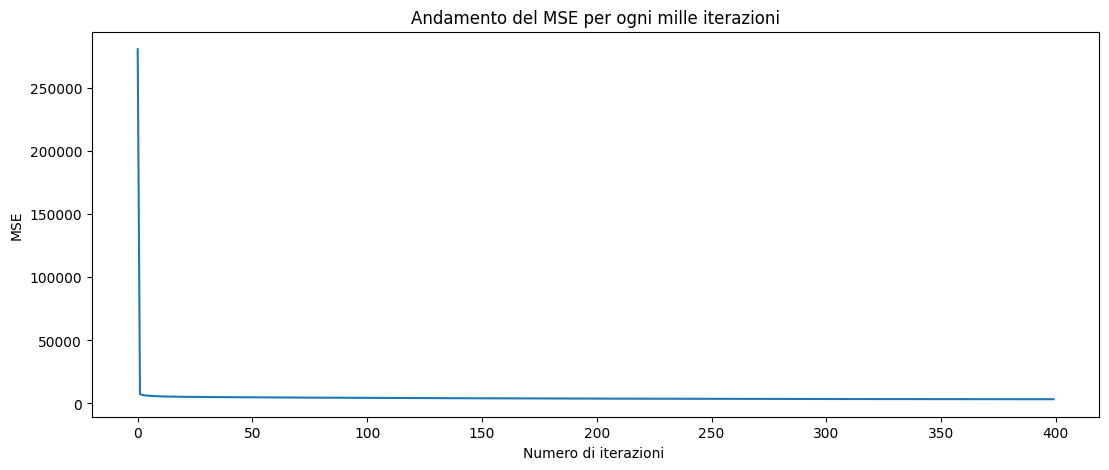

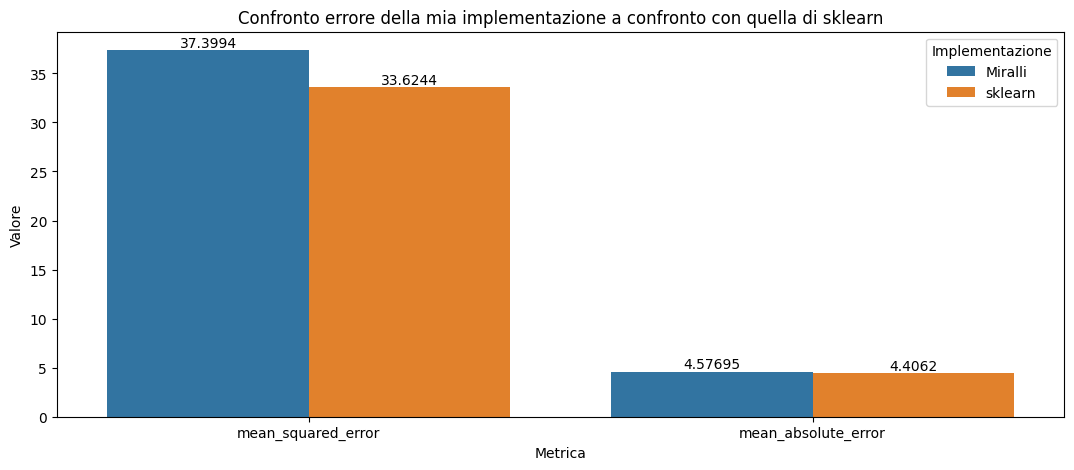

In [26]:
#grafici
plt.figure(figsize=(13, 5))

plt.title("Andamento del MSE per ogni mille iterazioni")
plt.xlabel("Numero di iterazioni ")
plt.ylabel("MSE")

plt.plot(np.arange(len(mse_list)),np.array(mse_list)*100)

err={"Valore":[mse,mae,mse_sk,mae_sk],
     "Metrica":["mean_squared_error","mean_absolute_error","mean_squared_error","mean_absolute_error"],
     "Implementazione":["Miralli","Miralli","sklearn","sklearn"]}
err_df=pd.DataFrame(data=err)


plt.figure(figsize=(13, 5))
x=sns.barplot(data=err_df, x="Metrica", y="Valore", hue="Implementazione")
x.bar_label(x.containers[0])
x.bar_label(x.containers[1])
plt.title("Confronto errore della mia implementazione a confronto con quella di sklearn")
plt.show()

## Conclusioni sul modello

La discesa stocastica del gradiente (SGD) si presenta come un metodo efficace per la regressione lineare, ottenendo risultati in termini di MSE molto simili a quelli ottenuti dalla formula chiusa dell'equazione normale.

Anche se in questo caso impiega più tempo di esecuzione , su grandi dataset porta dei vantaggi nei tempi di esecuzione.




---



# Classificazione con Regresione logistica

Le funzioni implementate in questo modello sono:

* **threshold**: Serve per la classificazione finale, applicando una soglia ai valori di probabilità generati dal modello per decidere le classi.
* **logistic**: Serve a portare tutti i valori nell'intervallo 0,1 con la seguente formula: $$\frac{1}{1+e^{-z}}$$ Questa funzione è nota anche come funzione sigmoide ed è fondamentale per trasformare i valori continui in probabilità.
* **logistic_regression**: Implementa il modello di regressione logistica, calcolando i pesi ottimali per le caratteristiche del dataset per massimizzare la probabilità delle classi osservate.
* **predict_log**: Utilizza il modello di regressione logistica per prevedere le classi delle nuove istanze, restituendo 0 o 1 in base alla soglia definita.

Questo è il primo modello di classificazione che implementiamo. Sarà una classificazione binaria che restituirà 0 per le persone che vanno da sottopeso fino a sovrappeso di tipo III e 1 per tutte le tipologie di obesità.



In [27]:
#implementazone

def threshold(res,value):
  binary_output=np.copy(res)
  binary_output[binary_output >= value] = 1
  binary_output[binary_output < value] = 0
  return binary_output

def  logistic(z):
  #valori per evitare l'overflow della funzione e successivo return di NaN
  z=np.clip(z,-100,100)
  return 1/(1+np.exp(-z))



def logistic_regression(x, y,alpha, num_iterations,grafico=False):
  acc_list=[]
  _,n=np.shape(x)
  c=np.random.rand(n,)

  for i in range(num_iterations):

    h_c=logistic(x@c)

    grad=(h_c-y)@x
    c=c-alpha*grad

    #codice che serve per avere l'accuracy nel temppo per poi fare il grafico allunga di molto il tempo di esecuzione
    if(grafico and i%1000==0):
      pred_temp=predict_log(x,c)
      acc=metrics.accuracy_score(y,pred_temp)
      acc_list.append(acc)

  return (c,acc_list)

def predict_log(test,c):
  #0,5 è un valore standar per esempio viene usato anche da sklearn
  return threshold(logistic(test@c),0.5)


## Iperparametri

Qui cerco i migliori iperparametri con la funzione da me implementata. Essendo un modello di classificazione, si prenderanno gli iperparametri che massimizzano l'accuratezza.

Per il modello di regressione logistica, gli iperparametri sono:

* alpha
* numero di iterazioni



In [28]:
ds=clas_dataset(dataset_training)
ds_test=clas_dataset(dataset_test)

x , y=get_x_y(ds,"NObeyesdad")
x_test ,y_test=get_x_y(ds_test,"NObeyesdad")

#fn_train,fn_pred,isReg,x_train,y_train,x_test,y_test,iper_par
iper=[[10e-6,200000],[10e-5,100000],[10e-5,150000]]
name=["alpha","numero di iterazione"]
scelti_rl=iper_s(logistic_regression,predict_log,False,x,y,x_test,y_test,iper,name)
print(f"Parametri scelti {name[0]}: {scelti_rl[0]}; {name[1]}: {scelti_rl[1]};")

C:\Users\user\AppData\Local\Temp\ipykernel_7500\2113211314.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds.Gender.replace(to_replace=gender_map , inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_7500\2113211314.py:36: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ds.Gender.replace(to

accuracy di: 95.75% per i parametri  alpha 1e-05; numero di iterazione 200000; 
accuracy di: 81.13% per i parametri  alpha 0.0001; numero di iterazione 100000; 
accuracy di: 94.81% per i parametri  alpha 0.0001; numero di iterazione 150000; 
Parametri scelti alpha: 1e-05; numero di iterazione: 200000;


## Test e confornto con sklearn

In qusta sezione:
* Confornto le metriche Accuracy,F1 score,AUC della mia implementazione con quelle di sklearn
* Grafico l'andamento del Accuracy durante il training

I risultati ottenuti sono paragonabili a quelli ottenuti da sklearn, avvote anche migliori, ma visto che ad ogni esecuzione si fa un mescolamento del database, cio non si verifica sempre.

In [29]:
#test

ds=clas_dataset(dataset_training)
ds_test=clas_dataset(dataset_test)

x , y=get_x_y(ds,"NObeyesdad")
x_test ,y_test=get_x_y(ds_test,"NObeyesdad")
#acc_list è una variabile utilizata per graficare l'andamento del'accuracy
c,acc_list=logistic_regression(x,y,*scelti_rl,grafico=True)
y_pred=predict_log(x_test, c)

acc=metrics.accuracy_score(y_test,y_pred)
f1=metrics.f1_score(y_test, y_pred)
false_p, true_p, _ = metrics.roc_curve(y_test, y_pred)
auc=metrics.auc(false_p, true_p)

print("Accuracy della mia implementazione di logistic_regression: {:.2f}%".format(acc * 100))
print("F1 score della mia implementazione di logistic_regression: {:.2f}%".format(f1 * 100))
print("AUC della mia implementazione di logistic_regression: {:.2f}%".format(auc * 100))
acc_list_final[0]=(round(acc*100,2))
acc_imp_final[0]=("regressione logistica")

C:\Users\user\AppData\Local\Temp\ipykernel_7500\2113211314.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds.Gender.replace(to_replace=gender_map , inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_7500\2113211314.py:36: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ds.Gender.replace(to

Accuracy della mia implementazione di logistic_regression: 95.75%
F1 score della mia implementazione di logistic_regression: 94.74%
AUC della mia implementazione di logistic_regression: 95.68%


In [30]:
#utilizzo di sklearn per confontare i risultati e verificare la correttezza


from sklearn.linear_model import LogisticRegression


model = LogisticRegression(solver='liblinear')
model.fit(x, y)


y_pred_sk = model.predict(x_test)


accuracy_sk=metrics.accuracy_score(y_test,y_pred_sk)
f1_sk=metrics.f1_score(y_test, y_pred_sk)
false_p, true_p, _ = metrics.roc_curve(y_test, y_pred_sk)
auc_sk=metrics.auc(false_p, true_p)

print("Accuracy di sklrean di logistic_regression: {:.2f}%".format(accuracy_sk * 100))
print("F1 score di sklrean di logistic_regression: {:.2f}%".format(f1_sk * 100))
print("AUC di sklrean di logistic_regression: {:.2f}%".format(auc_sk * 100))

Accuracy di sklrean di logistic_regression: 95.28%
F1 score di sklrean di logistic_regression: 94.12%
AUC di sklrean di logistic_regression: 95.09%


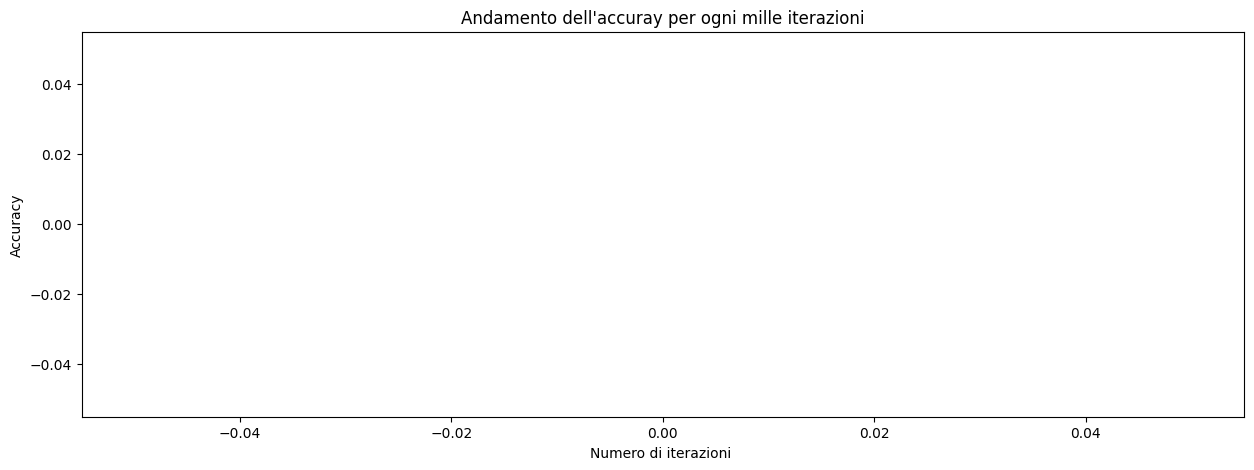

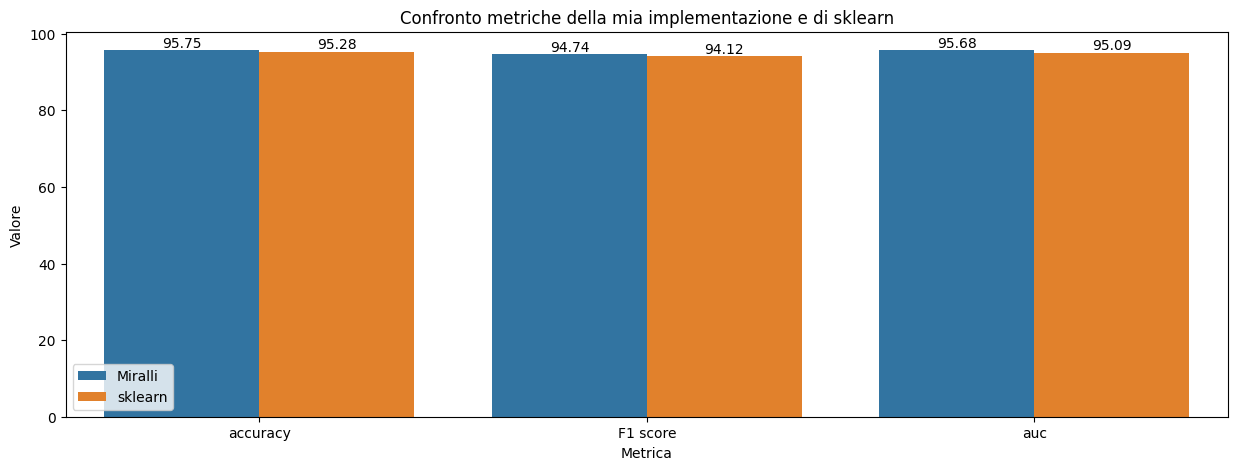

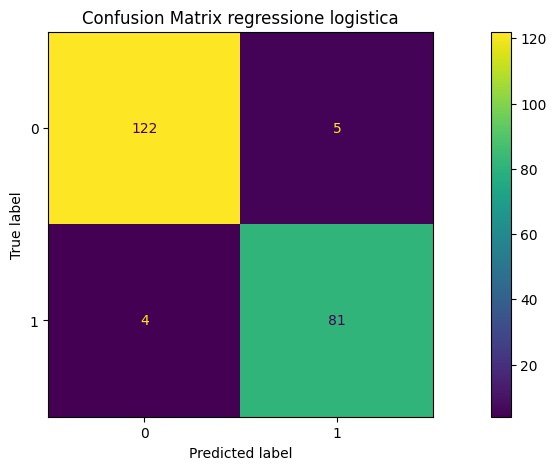

In [31]:
#grafici
plt.figure(figsize=(15, 5))

plt.title("Andamento dell'accuray per ogni mille iterazioni")
plt.xlabel("Numero di iterazioni ")
plt.ylabel("Accuracy")

plt.plot(np.arange(len(acc_list)),np.array(acc_list)*100)


metr={"Valore":[round(acc*100,2),round(f1*100,2),round(auc*100,2),round(accuracy_sk*100,2),round(f1_sk*100,2),round(auc_sk*100,2)],
      "Metrica":["accuracy","F1 score","auc","accuracy","F1 score","auc"],
      "Implementazione":["Miralli","Miralli","Miralli","sklearn","sklearn","sklearn"]}
accury_df=pd.DataFrame(data=metr)


plt.figure(figsize=(15, 5))
x=sns.barplot(data=accury_df,x="Metrica", y="Valore", hue="Implementazione")
x.bar_label(x.containers[0])
x.bar_label(x.containers[1])
x.legend(loc="lower left")
plt.title("Confronto metriche della mia implementazione e di sklearn")
plt.show()


fig, ax = plt.subplots(figsize=(15, 5))
cmd=metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_pred,ax=ax)
ax.set(title='Confusion Matrix regressione logistica')
plt.show()


## Conclusioni sul modello

La regressione logistica e uno dei migliori tra i modelli predittivi per la classificazione binarira.

Poi al aumentare il numero di iterazioni aumenta l'accuracy e si potrebbero implementare dei batch per aumentare la velocita di esecuzione e l'efficenza, implementando anche la discesa del gradiente stocastica ma per il nostro dataset di dimensioni ridotte non porterebbe a grandi vantaggi.


-----





#alberi di classificazione decisionale

Per l'implemetazione di questo modello per prima cosa ho implementato una classe albero per poter costruire un albero n-ario.

Poi ho implementato le funzioni per il modello vero e proprio che sono:

* Varie funzioni ausiliarie :
  * **p_n**: Calcola il numero di elementi positivi e negativi rimanenti nel dataset.
  * **same_class**: serve per vedere se sono rimasti tutti negativi o positivi
  *  **get_class**: serve ad ottenere la classivicazione degli elementi rimasti del dataset che hanno tutti lo setsso valore
* **entropy**: Calcola l'entropia di un insieme di dati.
* **remainder**: Calcola il remainder (entropia residua) dopo una suddivisione del dataset.
* **gain**: Calcola il guadagno di informazione ottenuto da una suddivisione del dataset.
* **max_important**:Identifica l'attributo con il massimo guadagno di informazione.
* **plurality_value**:Determina la classe maggioritaria in un insieme di dati.
* **lear_decision_tree**: la funzione usa tutte quelle precendentemente elencate, come nel algoritmo visto a lezione.
*  **predict_tree_all**: Predice le classi di appartenenza per tutti i punti dati del dataset utilizzando l'albero di decisione completo.
* **predict_tree**: Predice la classe di appartenenza per un singolo punto dato utilizzando l'albero di decisione completo.

Questo modello è il secondo che implementiamo per la classificazione, anche in questo caso binaria con 0 da sottopeso fino a sovrappeso di tipo III e 1 per qualsiasi livello di obbesità.





In [32]:
#classi per implementare un albero n-ario
class branch:
  def __init__(self,parent,child,label):
        self.parent = parent
        self.child = child
        self.label = label

class decision_tree:

    def __init__(self,attribute):
        self.attribute = attribute
        self.branches = []

    def add_branch(self,child,value):
        self.branches.append(branch(self,child,value))

   #funzione di stampa dell'albero
    def printTree(self, depth=0):
      #stampa dell'ultimo nodo (con il valore predetto)
      if not self.branches:

          if self.attribute:
            print(" -->"," True Obeyesdad:"+str(self.attribute))
          else:
            print(" -->"," False Obeyesdad:"+str(self.attribute))
      else:
          #stampa del percorso all'interno dell'albero, con l'oprzione
          #per stampare anche gli attributi dei vari split
          for branch in self.branches:
              #print("| "*depth, self.attr," ", end="")
              if depth==0:
                print("|"*depth, end="")
              else:
                print("|"*depth+"---", end="")
              #stampa del valore dell'attributo dello split corrente
              print(self.attribute,branch.label, end="")
              if branch.child.branches:
                  print()
              #chiamata ricorsiva per stampare il prossimo livello dell'albero
              branch.child.printTree(depth + 1)



In [33]:
#funzioni per l'implementazone
def p_n(ds,col="NObeyesdad"):
  p=0
  n=0
  for i in ds[col]:
    if(i==1):
      p+=1

  n=len(ds[col])-p
  return p,n


def entropy(ds,col="NObeyesdad"):
  p,n=p_n(ds)
  q=p/(p+n)
  if(q==0 or q==1):
    return 0

  return -(q*np.log2(q)+(1+q)*np.log2(1-q))


def remainder(ds,att):
  rem=0
  p,n=p_n(ds)
  for val,group in ds.groupby(att):
    pk,nk=p_n(group)
    rem+=((pk+nk)/(p+n))*entropy(group)

  return rem

def gain(ds,att):
  return entropy(ds)-remainder(ds,att)

def plurality_value(ds):
  p,n=p_n(ds)
  if p>n:
    return 1
  else:
    return 0

def same_class(ds):
  p,n=p_n(ds)
  return p==0 or n==0
#pr ottenere la ckassificazione (se sono tutti si o no)
def get_class(ds):
  p,n=p_n(ds)
  if(p==0):
    return 0
  if(n==0):
    return 1


def max_important(ds,atts):
  att=atts[0]
  max=gain(ds,att)
  for a in atts:
    g=gain(ds,a);
    if(g>max):
      att=a
      max=g
  return att

In [34]:
#implementazione
#l'attributi h_limit serve per limitare l'altezza del albero per evitare overfitting
#in questo caso non serve poichè l'altezza massima ottenuta viene sempre 2
def lear_decision_tree(ex,attributi,parent_ex,h_limit):

  if ex.empty:
    return decision_tree(plurality_value(parent_ex))
  elif same_class(ex):
    return decision_tree(get_class(ex))
  elif len(attributi)==0 or h_limit<0:
    return decision_tree(plurality_value(ex))
  else:
    att=max_important(ex,attributi)
    tree=decision_tree(att)
    for v,ex_att in ex.groupby(att):

      sub_tree=lear_decision_tree(ex_att,attributi,ex,h_limit-1)
      tree.add_branch(sub_tree,v)


  return tree


def predict_tree(tree,righa):
  a=0
  if tree.attribute==0 or  tree.attribute==1:
    return  tree.attribute
  min=abs(righa[1][tree.attribute]-tree.branches[0].label)

  for i in range(len(tree.branches)):
    if tree.branches[i].label == righa[1][tree.attribute]:
      return predict_tree(tree.branches[i].child,righa)
    if abs(righa[1][tree.attribute]-tree.branches[i].label)<min:
      a=i
      min=abs(righa[1][tree.attribute]-tree.branches[i].label)

  return  predict_tree(tree.branches[a].child,righa)

def predict_tree_all(tree,ds):
  y_pred=[]
  for rig in ds_test.iterrows():
    y_pred.append(predict_tree(tree,rig))
  return y_pred


## Iperparametri

Iperparametri da cercare:
* **H_limt**: che serve per limitare la profondità dell' albero

In qusto caso non usereme la funzione per vedere gli iperparametri ma un implementazione apposita che verifica se l'albero tende ad avere overfitting e misurando l'accuracy al aumentare della profondità

Come si puo vedere anche dopo quando stampo l'albero(durante il test e il confronto con sklearn) la sua profondità massima è 1 quindi non tende ad avere overfitting anche perchè vedendo il grafico anche al aumentare della profondità l'accuracy non diminuisce anzi rimane sempre la stessa.



C:\Users\user\AppData\Local\Temp\ipykernel_7500\2113211314.py:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds.Gender.replace(to_replace=gender_map , inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_7500\2113211314.py:49: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ds.Gender.replace(to

Accuracy con profondita 0 : 90.09%
Accuracy con profondita 1 : 96.70%
Accuracy con profondita 2 : 96.70%
Accuracy con profondita 3 : 96.70%
Accuracy con profondita 4 : 96.70%
----------------------------------------------------------------
Scelto con h_limit di: 1. Con una accuracy di: 95.75%
----------------------------------------------------------------


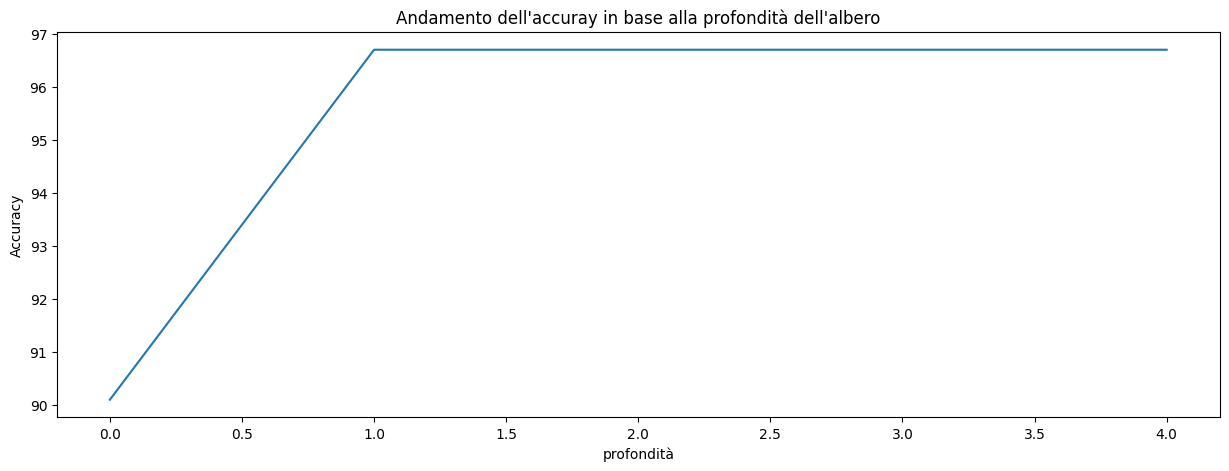

In [35]:
#iperparametri
ds=tree_dataset(dataset_training)
ds_test=tree_dataset(dataset_test)

y_test=ds_test['NObeyesdad']

attributi=ds.columns.tolist()
attributi.remove('NObeyesdad')

acc_pre=0
acc_andm=[]
best_h=0
for i in range(5):
  tree=lear_decision_tree(ds,attributi,None,i)
  y_pred=predict_tree_all(tree,ds)
  acc_iper=metrics.accuracy_score(y_test,y_pred)
  print("Accuracy con profondita "+str(i)+" : {:.2f}%".format(acc_iper * 100))
  if acc_pre<acc_iper:
    best_h=i
  acc_pre=acc_iper
  acc_andm.append(acc_iper)
print("----------------------------------------------------------------")
print("Scelto con h_limit di: "+str(best_h)+". Con una accuracy di: {:.2f}%".format(acc * 100))
print("----------------------------------------------------------------")

#grafico
plt.figure(figsize=(15, 5))

plt.title("Andamento dell'accuray in base alla profondità dell'albero")
plt.xlabel("profondità")
plt.ylabel("Accuracy")

plt.plot(np.arange(len(acc_andm)),np.array(acc_andm)*100)
plt.show()

## Test e confornto con sklearn

In qusta sezione:
* Confornto le metriche Accuracy,F1 score,AUC della mia implementazione con quelle di sklearn

Come si puo vedere dai risultati e dai grafici i risultati sono perfettamente equparabli

In [36]:
#test
ds=tree_dataset(dataset_training)
ds_test=tree_dataset(dataset_test)

y_test=ds_test['NObeyesdad']

attributi=ds.columns.tolist()
attributi.remove('NObeyesdad')

tree=lear_decision_tree(ds,attributi,None,best_h)

y_pred=predict_tree_all(tree,ds)

acc=metrics.accuracy_score(y_test,y_pred)
f1=metrics.f1_score(y_test, y_pred)
false_p, true_p, _ = metrics.roc_curve(y_test, y_pred)
auc=metrics.auc(false_p, true_p)

print("Accuracy della mia implementazione di decision tree: {:.2f}%".format(acc * 100))
print("F1 score della mia implementazione di decision tree: {:.2f}%".format(f1 * 100))
print("AUC della mia implementazione di decision tree: {:.2f}%".format(auc * 100))
acc_list_final[1]=(round(acc*100,2))
acc_imp_final[1]=("decision tree")

C:\Users\user\AppData\Local\Temp\ipykernel_7500\2113211314.py:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds.Gender.replace(to_replace=gender_map , inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_7500\2113211314.py:49: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ds.Gender.replace(to

Accuracy della mia implementazione di decision tree: 96.70%
F1 score della mia implementazione di decision tree: 96.00%
AUC della mia implementazione di decision tree: 97.05%


In [37]:
#utilizzo di sklearn per confontare i risultati e verificare la correttezza
from sklearn.tree import DecisionTreeClassifier


x , y=get_x_y(ds,"NObeyesdad")
x_test ,y_test=get_x_y(ds_test,"NObeyesdad")

model = DecisionTreeClassifier().fit(x, y)
y_pred_sk=model.predict(x_test)
accuracy_sk=metrics.accuracy_score(y_test,y_pred_sk)
f1_sk=metrics.f1_score(y_test, y_pred_sk)
false_p, true_p, _ = metrics.roc_curve(y_test, y_pred_sk)
auc_sk=metrics.auc(false_p, true_p)

print("Accuracy di sklrean di decision tree: {:.2f}%".format(accuracy_sk * 100))
print("F1 score di sklrean di decision tree: {:.2f}%".format(f1_sk * 100))
print("AUC di sklrean di decision tree: {:.2f}%".format(auc_sk * 100))

Accuracy di sklrean di decision tree: 96.70%
F1 score di sklrean di decision tree: 95.86%
AUC di sklrean di decision tree: 96.47%


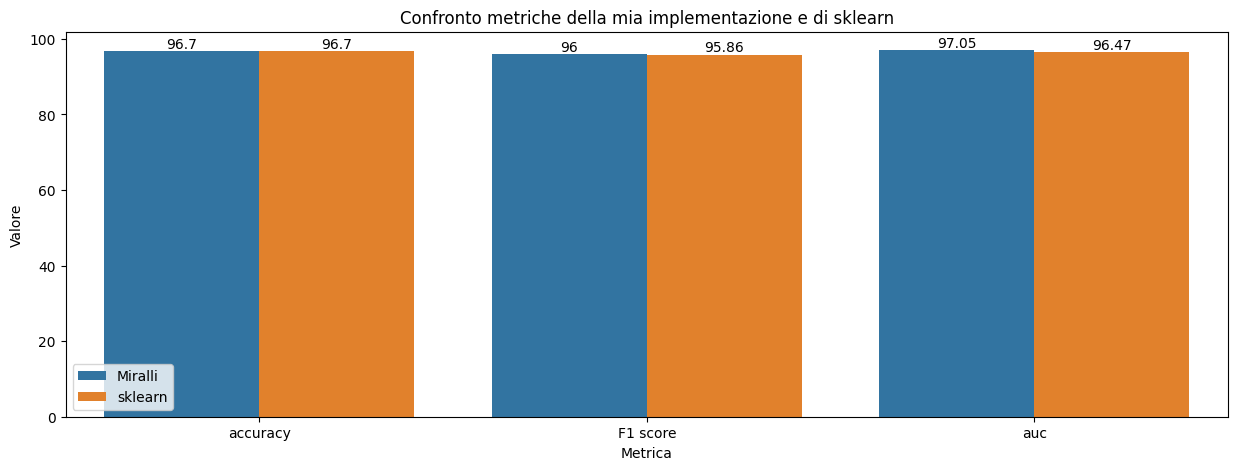

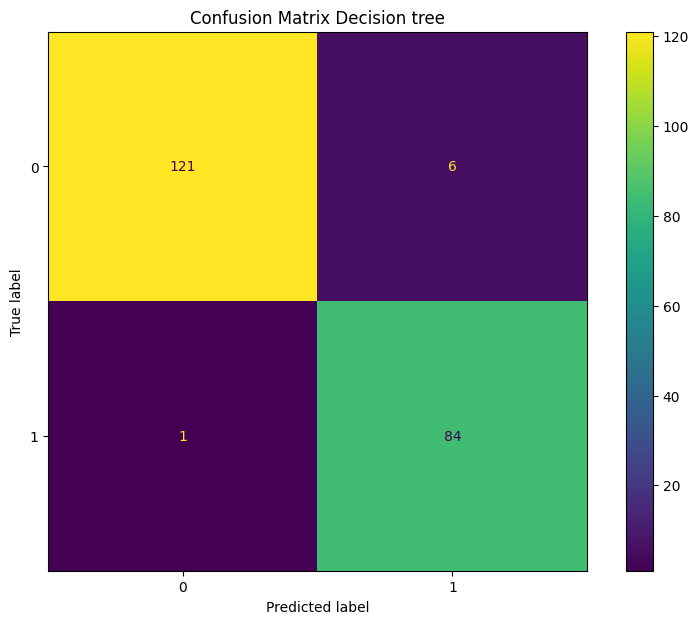

In [38]:
#grafici

metr={"Valore":[round(acc*100,2),round(f1*100,2),round(auc*100,2),round(accuracy_sk*100,2),round(f1_sk*100,2),round(auc_sk*100,2)],
      "Metrica":["accuracy","F1 score","auc","accuracy","F1 score","auc"],
      "Implementazione":["Miralli","Miralli","Miralli","sklearn","sklearn","sklearn"]}
accury_df=pd.DataFrame(data=metr)


plt.figure(figsize=(15, 5))
x=sns.barplot(data=accury_df,x="Metrica", y="Valore", hue="Implementazione")
x.bar_label(x.containers[0])
x.bar_label(x.containers[1])
x.legend(loc="lower left")
plt.title("Confronto metriche della mia implementazione e di sklearn")
plt.show()

fig, ax = plt.subplots(figsize=(10,7),dpi=100)
metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_pred,ax=ax)
ax.set(title='Confusion Matrix Decision tree')
plt.show()


In [39]:
#stampo l'albero
print("ora procedo a stampare l'albero:")
tree.printTree()

ora procedo a stampare l'albero:
Weight 39.0 -->  False Obeyesdad:0
Weight 40.0 -->  False Obeyesdad:0
Weight 41.0 -->  False Obeyesdad:0
Weight 42.0 -->  False Obeyesdad:0
Weight 43.0 -->  False Obeyesdad:0
Weight 44.0 -->  False Obeyesdad:0
Weight 45.0 -->  False Obeyesdad:0
Weight 46.0 -->  False Obeyesdad:0
Weight 47.0 -->  False Obeyesdad:0
Weight 48.0 -->  False Obeyesdad:0
Weight 49.0 -->  False Obeyesdad:0
Weight 50.0 -->  False Obeyesdad:0
Weight 51.0 -->  False Obeyesdad:0
Weight 52.0 -->  False Obeyesdad:0
Weight 53.0 -->  False Obeyesdad:0
Weight 54.0 -->  False Obeyesdad:0
Weight 55.0 -->  False Obeyesdad:0
Weight 56.0 -->  False Obeyesdad:0
Weight 57.0 -->  False Obeyesdad:0
Weight 58.0 -->  False Obeyesdad:0
Weight 59.0 -->  False Obeyesdad:0
Weight 60.0 -->  False Obeyesdad:0
Weight 61.0 -->  False Obeyesdad:0
Weight 62.0 -->  False Obeyesdad:0
Weight 63.0 -->  False Obeyesdad:0
Weight 64.0 -->  False Obeyesdad:0
Weight 65.0 -->  False Obeyesdad:0
Weight 66.0 -->  False

## Conclusioni sul modello

L'albero di decisione un approccio basato sulla funzione di guadagno, che lo rende capace di scegliere autonomamente l'attributo più informativo da esplorare ad ogni step. Questa strategia permette all'albero di crescere in modo efficiente, concentrandosi sulle caratteristiche più importanti dei dati.

---



# K nearest neighbors classificazione

Per questo modello di classificazione muticlasse(per quella binaria leggere i commenti nel blocco di test), ho implementato le seguenti funzioni:

* **knn**: Implementa l'algoritmo di classificazione K-Nearest Neighbors (KNN).
* **predict_knn**: Predice la classe di appartenenza di un nuovo punto dati utilizzando il modello KNN.


Per il calcolo della distanza tra i punti ho utilizzato la formula della distanza di Minkowski:

$$(\sum_{i=1}^{N} |x_i - y_i|^p)^{1/p}$$

Dove:

* $x$ e $y$ sono i vettori che rappresentano i punti da confrontare.
* $N$ è il numero di dimensioni del vettore
* $p$ è un parametro che determina il tipo di distanza utilizzata e in particolare si ha:
    * $p = 1$: distanza di Manhattan.
    * $p = 2$: distanza euclidea.

In [40]:
#implementazione
def knn_train(ds_train,riga_test,y_train,k,p):
  order_list=[]
  for i in range(len(ds_train)):
    #distanza di Distanza di Minkowski generalizzazione  di l1 e l2
    dist = np.power(np.sum(np.abs(np.power(riga_test - ds_train[i],p))),1/p)
    order_list.append((dist,y_train[i]))

  order_list.sort()
  k_list=[]

  for i in range(k):
    k_list.append(order_list[i][1])

  return max(set(k_list),key=k_list.count);

def predict_knn(ds_train,ds_test,y_train,k,p):
  y_pred=[]
  for i in range(len(ds_test)):
    y_pred.append(knn_train(ds_train,ds_test[i],y_train,k,p))

  return y_pred


## iperparametri

Qui cerco i migliori iperparametri con la funzione da me implementata essenodo un modello di classificazione si prenderenno gli iperparametri che minimanizano l'accuracy.

Per il modello di regressione logistica sono:

* **k**: il numero di vicini
* **p**: tipologia di distanza con la formula di Minkowski



In [41]:
#iperparametri
#mettere il parametro binaria a true per avre la classificazione binaria
binaria=False
ds_train=normalaiz_dataset(dataset_training,binaria)
ds_test=normalaiz_dataset(dataset_test,binaria)
x_train,y_train=get_x_y(ds_train,"NObeyesdad")
x_test,y_test=get_x_y(ds_train,"NObeyesdad")

iper=[[2,1],[3,2],[2,2]]
name=["vicini (k)","tipologia di distanza (p)"]
scelti_knn=iper_s(predict_knn,None,False,x_train,y_train,x_test,y_test,iper,name)
print(f"Parametri scelti {name[0]}: {scelti_knn[0]}; {name[1]}: {scelti_knn[1]};")

C:\Users\user\AppData\Local\Temp\ipykernel_7500\2113211314.py:64: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds.Gender.replace(to_replace=gender_map , inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_7500\2113211314.py:64: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ds.Gender.replace(to

accuracy di: 93.47% per i parametri  vicini (k) 2; tipologia di distanza (p) 1; 
accuracy di: 91.00% per i parametri  vicini (k) 3; tipologia di distanza (p) 2; 
accuracy di: 91.47% per i parametri  vicini (k) 2; tipologia di distanza (p) 2; 
Parametri scelti vicini (k): 2; tipologia di distanza (p): 1;


## Test e confornto con sklearn

In questa sezione:

* Confronto l'accuratezza della mia implementazione con quella di scikit-learn.

Come si può vedere dai risultati e dai grafici, i risultati sono perfettamente comparabili.


In [42]:
#test
#mettere il parametro binaria a true per avre la classificazione binaria
binaria=False #ricordarsi di cambiarlo anche per gli iperparametri se si vogliono ritastare in binaria
ds_train=normalaiz_dataset(dataset_training,binaria)
ds_test=normalaiz_dataset(dataset_test,binaria)
x_train,y_train=get_x_y(ds_train,"NObeyesdad")
x_test,y_test=get_x_y(ds_train,"NObeyesdad")

#iperparametro K
k=5
p=1
y_pred=predict_knn(x_train,x_test,y_train,*scelti_knn)

acc=metrics.accuracy_score(y_test,y_pred)
acc_list_final[2]=round(acc*100,2)
acc_imp_final[2]="KNN"
print("Accuracy della mia implementazione di K nearest neighbors: {:.2f}%".format(acc * 100))
if binaria:
  f1=metrics.f1_score(y_test, y_pred)
  false_p, true_p, _ = metrics.roc_curve(y_test, y_pred)
  auc=metrics.auc(false_p, true_p)
  print("F1 score della mia implementazione  di K nearest neighbors: {:.2f}%".format(f1 * 100))
  print("AUC della mia implementazione  di K nearest neighbors: {:.2f}%".format(auc * 100))

C:\Users\user\AppData\Local\Temp\ipykernel_7500\2113211314.py:64: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds.Gender.replace(to_replace=gender_map , inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_7500\2113211314.py:64: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ds.Gender.replace(to

Accuracy della mia implementazione di K nearest neighbors: 93.47%


In [43]:
#utilizzo di sklearn per confontare i risultati e verificare la correttezza
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k )
knn.fit(x_train, y_train)
y_pred_sk = knn.predict(x_test)

acc_sk=metrics.accuracy_score(y_test,y_pred_sk)
print("Accuracy sk_learn di K nearest neighbors classificazione: {:.2f}%".format(acc_sk * 100))
if binaria:
  f1_sk=metrics.f1_score(y_test, y_pred)
  false_p, true_p, _ = metrics.roc_curve(y_test, y_pred)
  auc_sk=metrics.auc(false_p, true_p)
  print("F1 score della mia implementazione  di K nearest neighbors: {:.2f}%".format(f1_sk * 100))
  print("AUC della mia implementazione  di K nearest neighbors: {:.2f}%".format(auc_sk * 100))

Accuracy sk_learn di K nearest neighbors classificazione: 87.73%


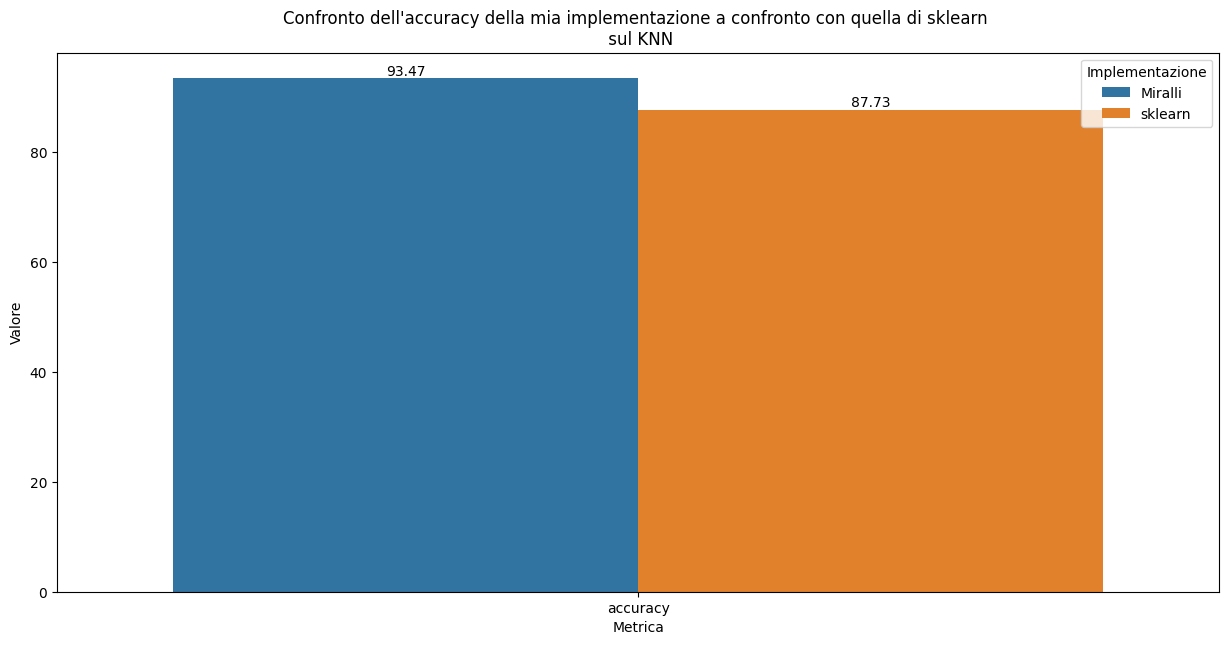

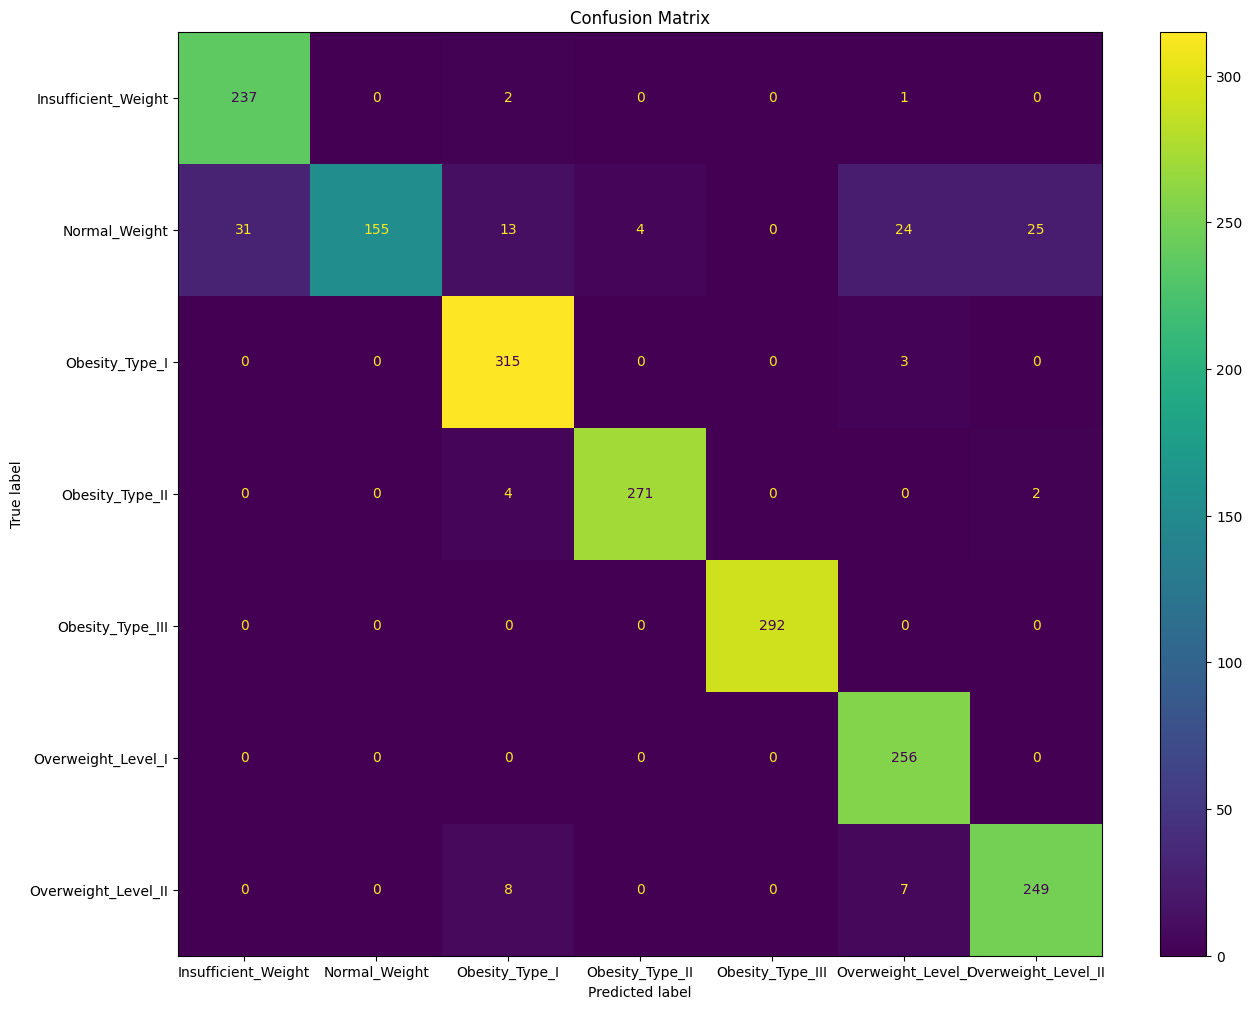

In [44]:
#grafici
if binaria:
  metr={"Valore":[round(acc*100,2),round(f1*100,2),round(auc*100,2),round(acc_sk*100,2),round(f1_sk*100,2),round(auc_sk*100,2)],
      "Metrica":["accuracy","F1 score","auc","accuracy","F1 score","auc"],
      "Implementazione":["Miralli","Miralli","Miralli","sklearn","sklearn","sklearn"]}
  accury_df=pd.DataFrame(data=metr)
else:
  accury={"Valore":[round(acc*100,2),round(acc_sk*100,2)],
        "Metrica":["accuracy","accuracy"],
        "Implementazione":["Miralli","sklearn"]}
  accury_df=pd.DataFrame(data=accury)

plt.figure(figsize=(15, 7))
x=sns.barplot(data=accury_df,x="Metrica", y="Valore", hue="Implementazione")
x.bar_label(x.containers[0])
x.bar_label(x.containers[1])
plt.title("Confronto dell'accuracy della mia implementazione a confronto con quella di sklearn \n sul KNN")
plt.show()

fig, ax = plt.subplots(figsize=(15,12),dpi=100)
cmd=metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_pred,ax=ax)
ax.set(title='Confusion Matrix')
plt.show()

## Conclusioni sul modello

L'implementazione dell'algoritmo K-Nearest Neighbors (KNN) si è dimostrata un metodo valido per la classificazione multiclasse. A differenza di altri modelli di classificazione, da noi implementati, la sua semplicità ci ha permesso di implementarlo in modo efficace per problemi multiclasse.

Tuttavia, è importante considerare le limitazioni del KNN prima di applicarlo a nuovi dati. Tra queste, la dipendenza dalla distanza e la sensibilità al rumore sono i fattori chiave da tenere in considerazione.


---



# Regressione con Reti neurali

 L'implementato della rete neurale per la regressione utilizzando la funzione di attivazione ReLU.

Le funzioni create per implementare questo modello sono:

* **relu**: Implementa la funzione di attivazione ReLU.
* **relu_derivative**: Calcola la derivata della funzione ReLU.
* **set_weights**: Inizializza casualmente i pesi della rete neurale all'avvio dell'addestramento.
* **forward_prop**: Esegue la propagazione forward attraverso la rete neurale.
* **back_prop**: Esegue la propagazione backward per calcolare il gradiente della funzione di perdita rispetto ai pesi.
* **train_neural_network**: Addestra la rete neurale utilizzando l'algoritmo di backpropagation.
* **predict_NN**: Prevede l'output della rete neurale per un nuovo set di dati.

La funzione di Loss che vogliamo minimizzare è:

  $$\frac{1}{2}\sum_{i}(d_{pi}-y_{pi})^{2}$$



In [45]:
def relu(x):
  return np.maximum(0, x, dtype='float64')

def relu_derivative(dA, Z):
  dZ = np.array(dA, copy=True)
  dZ[Z <= 0] = 0
  return dZ

def setweights(layers):
  weights=[]
  for i in range(len(layers) - 1):

      in_layer = layers[i]
      out_layer = layers[i+1]

      weight = np.random.randn(out_layer, in_layer) * np.sqrt(2.0 / float(in_layer))

      weights.append(weight)
  return weights


def forwardprop(X,weights,layers):
  A = np.asmatrix(np.copy(X), dtype='float64').T

  lista_z = []
  lista_a = []

  lista_a.append(A)

  #-1 l'ultimo layer non va calcolato
  for i in range(len(layers)-1):
    weight =weights[i]
    Z = weight @ A
    A = relu(Z)
    lista_a.append(A)
    lista_z.append(Z)

  return lista_z,lista_a

def backprop(Y_pred, Y,layers,lista_a,lista_z,weights):

  dW = []

  dA_prev = (Y_pred - Y)

  for i in reversed(range(len(layers)-1)):

    dA_curr = dA_prev

    A_prev = lista_a[i]
    Z_curr = lista_z[i]
    W_curr = weights[i]

    dZ_curr = relu_derivative(dA_curr, Z_curr)


    dW_curr = (dZ_curr @ A_prev.T)
    dA_prev = W_curr.T @ dZ_curr

    dW.insert(0,dW_curr)


  return dW

def reti_neurali(x_train, y_train,weights,layers, alpha, num_iterations,stampa):
  loss_old=[]

  global N_inizi #serve per evitare infinite riattivazioni
  for iter in range(num_iterations): #scorriamo il dataset

    loss = 0

    lista_dW = []


    for x, y in zip(x_train, y_train):

      Z_list,A_list=forwardprop(x,weights,layers)
      y_pred = A_list[-1]

      loss = loss + np.power((y_pred - y), 2) / 2

      dW = backprop(y_pred, y,layers,A_list,Z_list,weights) #calcoliamo i gradienti con la backprop

      lista_dW.append(dW)

      for i in range(len(layers)-1): #facciamo gradient descent

        weights[i] = weights[i] - alpha * dW[i]

    loss = loss / x_train.shape[0]

    #controllo se la differenza  delle prime 5 iterazioni è minore di 10e-6 allora riniziallizza i pesi e riavvia il trainig
    if iter < 5:
      loss_old.append(loss[0])
    if iter == 5:
      if np.std(loss_old)-loss_old[4]<10e-6 and N_inizi <= 5:
        if stampa:
          print("rinizio")

        N_inizi=N_inizi+1
        weight = setweights(layers)
        weights= reti_neurali(x_train, y_train,weight,layers, alpha, num_iterations,stampa)
        return weights
      elif N_inizi>5:
        print("Troppi restart rieseguire la cella di collab")
        break
    if stampa:
      if iter <10:
        print(f'Iterazione {iter+1}, Loss: {loss.item()}')
      elif (iter+1)%10==0:
         print(f'Iterazione {iter+1}, Loss: {loss.item()}')

  return weights

def predict_NN(x_test,weights,layers):
  y_pred = list()

  for x in x_test:
    _ ,lista_a=forwardprop(x,weights,layers)
    y_pred.append(float(lista_a[-1].item()))

  return np.array(y_pred)


## Iperparametri

Qui cerco i migliori iperparametri con la funzione da me implementata essenodo un modello di regressione si prenderenno gli iperparametri che minimanizano MSE.

Per il modello di reteneurale sono:
* numero di neuroni e hiden layer
* alpha
* numero di iterazioni

per come ho implementato la rete neurale il numero di neuroni e hiden layer è un unico iperparametro e il numero di iterazioni che vengono testate è ppositamente basso per evitare tempi di esecuzione troppo lunghi, ovviamente aumentando le iterazioni si potrebbe ridurre ancora di piu MSE

In [46]:
ds=set_dataset(dataset_training)
ds_test=set_dataset(dataset_test)

x_train , y_train=get_x_y(ds,"Weight",True)
x_test ,y_test=get_x_y(ds_test,"Weight",True)

N_inizi=0
#fn_train,fn_pred,isReg,x_train,y_train,x_test,y_test,iper_par
iper=[[[16,8],10e-6,70],[[64,32],10e-6,150],[[32,16,8],10e-7,100]]
name=["numero di neuroni e relativi layer nascosti","alpha","numero di iterazione"]
scelti_nn=iper_s(reti_neurali,predict_NN,True,x_train,y_train,x_test,y_test,iper,name)
print(f"Parametri scelti {name[0]}: {scelti_nn[0]}; {name[1]}: {scelti_nn[1]}; {name[2]}: {scelti_nn[2]}; ")

C:\Users\user\AppData\Local\Temp\ipykernel_7500\2113211314.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds.Gender.replace(to_replace=gender_map , inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_7500\2113211314.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ds.Gender.replace(to

MSE di: 37.021366708504004 per i parametri  numero di neuroni e relativi layer nascosti [16, 8]; alpha 1e-05; numero di iterazione 70; 
MSE di: 29.21625350445309 per i parametri  numero di neuroni e relativi layer nascosti [64, 32]; alpha 1e-05; numero di iterazione 150; 
MSE di: 69.90893027309174 per i parametri  numero di neuroni e relativi layer nascosti [32, 16, 8]; alpha 1e-06; numero di iterazione 100; 
Parametri scelti numero di neuroni e relativi layer nascosti: [64, 32]; alpha: 1e-05; numero di iterazione: 150; 


## Test del codice

In questo caso, sklearn non implementa alcun metodo per le reti neurali, impedendoci un confronto diretto dei risultati. Tuttavia, osservando gli altri modelli di regressione da noi implementati, notiamo che le metriche MSE e MAE ottenute si allineano con i risultati raggiunti dagli altri modelli di regressione.



In [47]:
#test
ds=set_dataset(dataset_training)
ds_test=set_dataset(dataset_test)

x_train , y_train=get_x_y(ds,"Weight",True)
x_test ,y_test=get_x_y(ds_test,"Weight",True)

N_inizi=0
mse_list=[]
hidden_layers=scelti_nn[0]
layers=[x_train.shape[1]]+hidden_layers+[1]#il primo è l'imput e l'ultmio e l'output
weight = setweights(layers)

weight=reti_neurali(x_train, y_train, weight ,layers ,scelti_nn[1],scelti_nn[2],True)

y_pred = predict_NN(x_test,weight,layers)

mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)

print("MSE: " + str(mse))
print("MAE: " + str(mae))

mse_list_final[2]=mse
mse_imp_final[2]="reti neurali"

C:\Users\user\AppData\Local\Temp\ipykernel_7500\2113211314.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds.Gender.replace(to_replace=gender_map , inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_7500\2113211314.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ds.Gender.replace(to

Iterazione 1, Loss: 269.3798137392449
Iterazione 2, Loss: 60.12026569095952
Iterazione 3, Loss: 51.23149892237331
Iterazione 4, Loss: 46.38601795928143
Iterazione 5, Loss: 42.9597566768754
Iterazione 6, Loss: 40.43043667229328
Iterazione 7, Loss: 38.341543576816825
Iterazione 8, Loss: 36.58433810391838
Iterazione 9, Loss: 35.09328183721785
Iterazione 10, Loss: 33.67333150685635
Iterazione 20, Loss: 24.697971325948977
Iterazione 30, Loss: 20.158026344327403
Iterazione 40, Loss: 18.167439585715986
Iterazione 50, Loss: 17.193162734700557
Iterazione 60, Loss: 16.502034556436968
Iterazione 70, Loss: 15.979910784803616
Iterazione 80, Loss: 15.552883008719201
Iterazione 90, Loss: 15.186042761233757
Iterazione 100, Loss: 14.859841960069698
Iterazione 110, Loss: 14.585211900525971
Iterazione 120, Loss: 14.314966408413117
Iterazione 130, Loss: 14.077373593138738
Iterazione 140, Loss: 13.865453771911572
Iterazione 150, Loss: 13.647997835550404
MSE: 27.1383287470958
MAE: 3.94512220753488


## Conclusioni sul modello

Le reti neurali, tra i modelli da noi implementati, rappresentano quelli computazionalmente più complessi. Questo perché l'elevato numero di nodi nascosti comporta tempi di esecuzione notevolmente lunghi, che si amplificano ulteriormente se si adotta una rete con più livelli nascosti e un alto numero di neuroni in ogni livello.

Nonostante la sua efficacia nei compiti di regressione, questa complessità non si traduce in un miglioramento significativo delle prestazioni tale da giustificare la sua scelta, soprattutto in considerazione della ridotta dimensione del dataset a disposizione per l'addestramento. In questo caso, l'utilizzo di un modello di regressione alternativo potrebbe risultare più appropriato.


---



# Conclusioni finali

Come emerge dal grafico sottostante, che confronta le performance di tutti i modelli di regressione e classificazione implementati, i risultati ottenuti sono tra loro comparabili. Sebbene alcuni modelli abbiano ottenuto prestazioni migliori rispetto ad altri, non è possibile stabilire un modello intrinsecamente migliore.

Ad esempio, la regressione lineare con SGD presenta in questo caso un MSE peggiore rispetto alla regressione con equazione normale. Tuttavia, come già accennato, per dataset più grandi la regressione con SGD vanta un tempo di esecuzione nettamente inferiore.

**Modelli di regressione**:

I modelli di regressione che hanno ottenuto le migliori performance sono la regressione lineare (con equazione normale) e le reti neurali. Tuttavia, a causa della randomizzazione del dataset ad ogni esecuzione, i risultati possono variare, con le reti neurali che a volte ottengono prestazioni leggermente migliori. Considerando l'elevato costo computazionale delle reti neurali e il minimo vantaggio in termini di MSE per questo dataset, il loro utilizzo non risulta particolarmente conveniente.

**Modelli di classificazione**:

Analogamente ai modelli di regressione, i modelli di classificazione presentano prestazioni simili tra loro, data la randomizzazione del dataset, ma spesso l'albero di classificazione ottiene di leggermente dei risultati migliori.

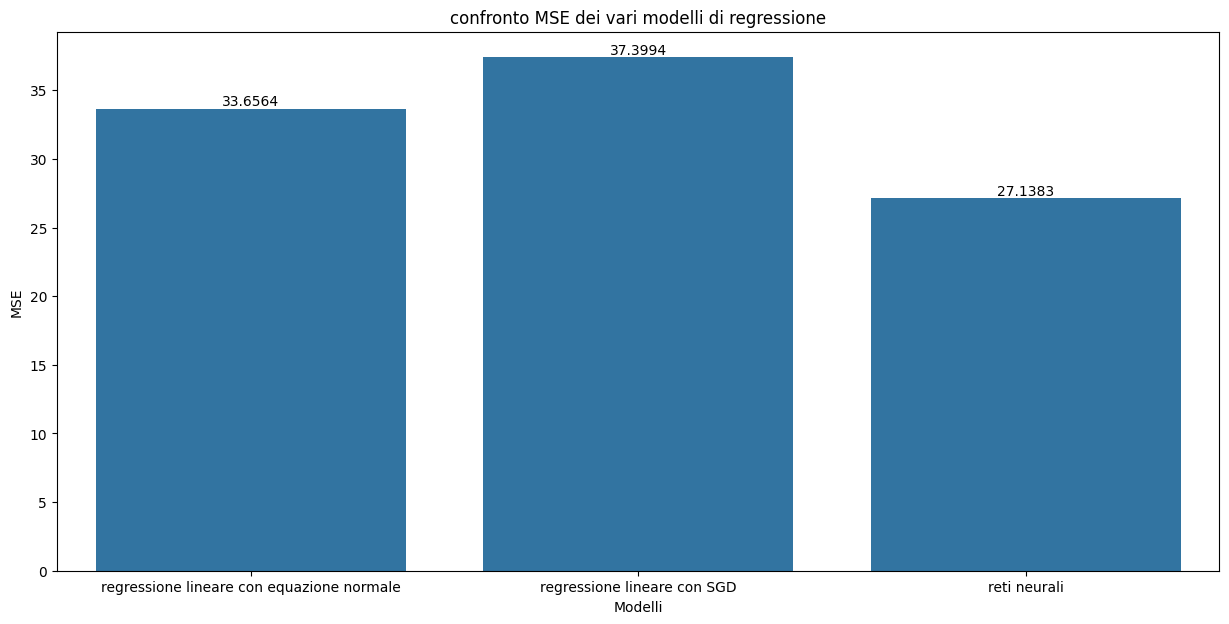

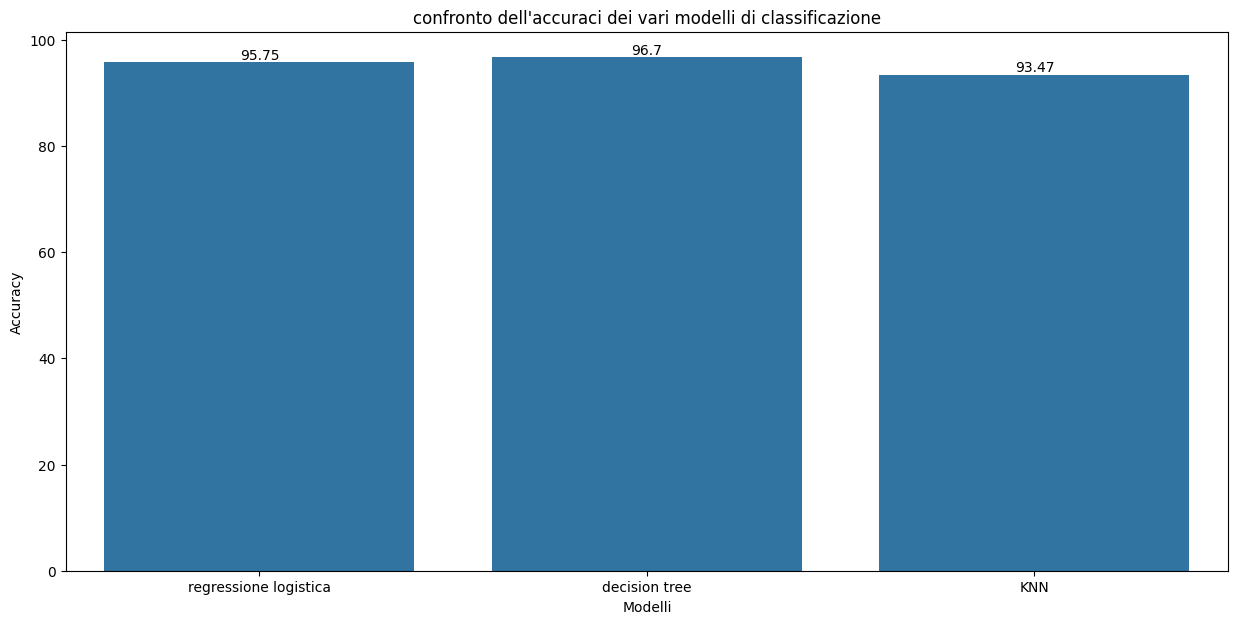

In [48]:
dati={"MSE":mse_list_final,
      "Modelli":mse_imp_final}
dati_df=pd.DataFrame(data=dati)

plt.figure(figsize=(15, 7))
x=sns.barplot(data=dati_df,x="Modelli", y="MSE")
x.bar_label(x.containers[0])

plt.title("confronto MSE dei vari modelli di regressione")
plt.show()

print()

dati={"Accuracy":acc_list_final,
      "Modelli":acc_imp_final}
dati_df=pd.DataFrame(data=dati)

plt.figure(figsize=(15, 7))
x=sns.barplot(data=dati_df,x="Modelli", y="Accuracy")
x.bar_label(x.containers[0])

plt.title("confronto dell'accuraci dei vari modelli di classificazione")
plt.show()